<div style="text-align: center; background-color: #559cff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Lab 02 - Introduction To Data Science @ FIT-HCMUS, VNU-HCM 📌
</div>

<div style="text-align: center; background-color: #b1d1ff; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 40px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 4.0 - Data modelling
</div>

This section for bouns, you might need to use some basic Machine Learning algorithms to answer some questions that in cases of regression, and classification. In this scope of this subject, highly recommend you use `scikit-learn` (instead of implement once again these algorithms)

## Import

In [1]:
# YOUR CODE HERE (OPTION) 
# If you need other libraries, you can import them here
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression


**In this step, we will use machine learning to answer the question. prediction the total population of the United States 10 years later using machine learning**

## Data preparation

First of all, we need to prepare the dataset. We only use data set of United States. I choose Total Population is the dependent variable. Other column relevant to this variable that i can choose are: 
- 'Birth Rate', 
- 'Death Rate', 
- 'Net income from Abroad', 
- 'School enrollment, primary', 
- 'School enrollment, tertiary', 
- 'GDP in USD', 
- 'Compulsory Education Dur.',
- 'Year'

In [77]:
# YOUR CODE HERE (OPTION)
cleaned_df = pd.read_csv("../data/processed/21127635_americas_processed.csv")
dataset = cleaned_df[['Birth Rate', 'Death Rate', 'Compulsory Education Dur.','GDP in USD','Net income from Abroad','School enrollment, primary', 'School enrollment, tertiary','Year', 'Country','Total Population']]
UnitedStatedata = dataset[dataset["Country"] == "United States"].copy()
UnitedStatedata.drop("Country", inplace=True, axis='columns')
UnitedStatedata.reset_index(drop = True, inplace= True)
UnitedStatedata.sort_values("Year")
# UnitedStatedata = UnitedStatedata.applymap(format_values)
# UnitedStatedata['Year'] = UnitedStatedata['Year'].astype(int)

,Birth Rate,Death Rate,Compulsory Education Dur.,GDP in USD,Net income from Abroad,"School enrollment, primary","School enrollment, tertiary",Year,Total Population
27,14.600000,8.800000,10.879921,7.639749e+12,2.795200e+10,105.278030,79.440460,1995,266278000.0
26,14.400000,8.800000,10.879921,8.073122e+12,3.086900e+10,104.087097,78.833359,1996,269394000.0
25,14.200000,8.700000,10.879921,8.577554e+12,2.330000e+10,106.128710,39.528947,1997,272657000.0
24,14.300000,8.600000,12.000000,9.062818e+12,1.741100e+10,102.175888,70.507736,1998,275854000.0
23,14.200000,8.600000,12.000000,9.631174e+12,3.090400e+10,101.391563,71.152428,1999,279040000.0
22,14.400000,8.500000,12.000000,1.025095e+13,3.848100e+10,106.128710,39.528947,2000,282162411.0
21,14.100000,8.500000,12.000000,1.058193e+13,5.036400e+10,106.128710,39.528947,2001,284968955.0
20,14.000000,8.500000,12.000000,1.092911e+13,4.579400e+10,106.128710,39.528947,2002,287625193.0
19,14.100000,8.400000,12.000000,1.145644e+13,5.849600e+10,106.128710,39.528947,2003,290107933.0
18,14.000000,8.200000,12.000000,1.221719e+13,7.671300e+10,106.128710,39.528947,2004,292805298.0


## Feature engineering

In [78]:
# YOUR CODE HERE (OPTION)

# X = UnitedStatedata.iloc[:, :-1].values
# y = UnitedStatedata.iloc[:, -1].values
X = UnitedStatedata[['Birth Rate', 'Death Rate', 'Compulsory Education Dur.', 'GDP in USD', 'Net income from Abroad', 'School enrollment, primary', 'School enrollment, tertiary', 'Year']]
y = UnitedStatedata['Total Population']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)
# X_test['Year'] = X_test['Year'].astype(int)

## Training model

In [79]:
# YOUR CODE HERE (OPTION)
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Evaluation

In [82]:
# YOUR CODE HERE (OPTION)
from sklearn.metrics import mean_squared_error, r2_score 
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

## Prediction

In [86]:
# YOUR CODE HERE (OPTION) 
y_pred = model.predict(X_test)
y_pred

array([3.16e+08, 2.72e+08, 3.19e+08, 2.85e+08, 3.48e+08, 3.09e+08])

## Results analysis

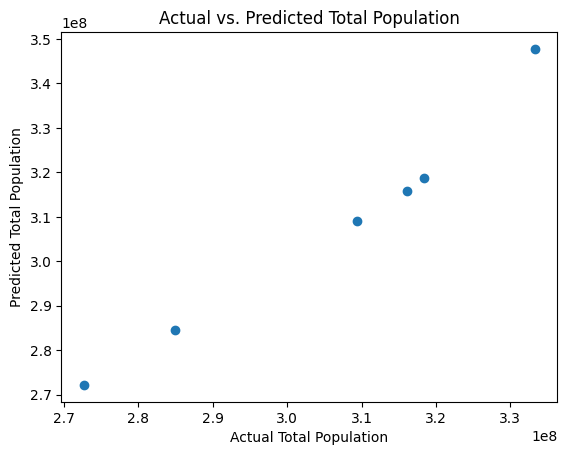

In [83]:
# YOUR CODE HERE (OPTION)
# import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("Actual Total Population")
plt.ylabel("Predicted Total Population")
plt.title("Actual vs. Predicted Total Population")
plt.show()
 

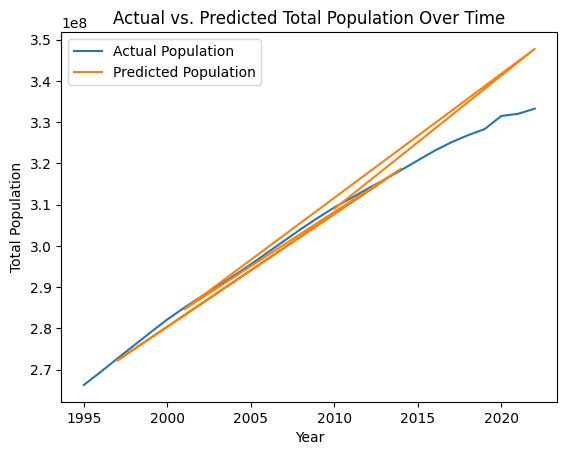

In [84]:
plt.plot(UnitedStatedata['Year'], UnitedStatedata['Total Population'], label="Actual Population")
plt.plot(X_test['Year'], y_pred, label="Predicted Population")
plt.xlabel("Year")
plt.ylabel("Total Population")
plt.legend()
plt.title("Actual vs. Predicted Total Population Over Time")
plt.show()


## Conclusion

**Your conclusion**

As we can see, Machine Learning is quite good from given variables. Because the test set is quite approximately with the train set